# SEN122A Statistical Analysis of Choice Behaviour

## `Lab session 01A:`
## `Introduction to choice behaviour analysis`

**Delft University of Technology**<br>
**Q2 2025**<br>
**Instructor:** Sander van Cranenburgh<br>
**TA:**  Gabriel Nova <br>

### `Instructions`

**Lab sessions aim to:**<br>
* Illustrate how models and theory discussed in the classroom work out in practice.
* Help you gather hands-on modelling and data analysis skills.


**Lab sessions are:**<br>
* Learning environments where you work with Python and get support from TA and fellow students.
* Not graded and do not have to be submitted.
* A good preparation for the graded partial exam.

### `Use of AI tools`
AI tools, such as ChatGPT and Co-pilot, are great tools to assist with programming. Moreover, in your later careers, you will work in a world where such tools are widely available. As such, we **encourage** you to use AI tools **effectively**. However, be careful not to overestimate the capacity of AI tools! AI tools cannot replace you: you still have to conceptualise the problem, dissect it and structure it to conduct proper analysis. We recommend being especially **reticent** with using AI tools for the more conceptual and reflection-oriented questions. <br>
Futhermore **be aware** that during the `partial exam`, you will not have access to these tools (since internet access will be restricted).

### `Workspace set-up`

Follow the instructions in the [`README`](../../README.md) file to set up your programming environment.

### `Application: Modelling neighbourhood choices`

In this lab session, we will analyse neighbourhood location choice behaviour. Understanding people's preferences over neighbourhood characteristics is crucial for city planners when they (re)develop neighbourhoods or devise policies to tackle e.g. residential segregation. During this lab session, you will apply discrete choice models to uncover people's preferences over attributes, such as the distance to the city centre and the share of foreigners in their neighbourhood. Also, you will explore whether preferences interact with covariates such as age, gender, home ownership, car ownership and urbanisation level. While doing so, you will test various utility specifications and interpret the modelling outcomes of discrete choice models.

For this study, we use data from a Stated Choice (SC) experiment, which was conducted between 2017 and 2018 in four European cities: Hanover, Mainz, Bern, and Zurich.

![SC](./assets/sc_experiment.png)

**`Learning objectives lab session 01A`**

After completing the following lab session, you will be able to:
* Discover choice data
* Estimate RUM-based multinomial logit discrete choice models using the Python package called `Biogeme`
* Interpret the modelling results of RUM-MNL models
* Forecast market shares by applying an estimated discrete choice model


**`This lab consists of 3 parts and has 4 exercises`**

**Part 1**: Load and explore the data set
- Exercise 1: "Representativeness of the sample"

**Part 2**: The linear-additive RUM-MNL model
- Exercise 2: "Interpreting modelling outcomes"
- Excerise 3: "Attribute importance"

**Part 3**: Market share forecasting for Zurich
- Excerise 4: "Forecasting"

#### `Import packages`

To begin, we will import all the Python libraries that we will use in this lab session.

In [1]:
# Biogeme
import biogeme.database as db
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta, Variable, log, exp

# General python packages
import sys
import os
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from pathlib import Path

# Pandas setting to show all columns when displaying a pandas dataframe
pd.set_option('display.max_columns', None)

In [2]:
# Add the utils folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

# Import the bio_estimation_fcns from the utils folder
from utils.bio_estimation_fcns import print_results

### `1. Load and explore the data set` <br>

**`Load the data set`** <br>

In [3]:
# Create that path to the data file
data_path =  Path(f'data/choice_data.dat')
print(data_path)

data/choice_data.dat


Load the choice data, using `read_csv()` from Pandas: 

In [4]:
# Load the data as a pandas dataframe
df = pd.read_csv(data_path, sep='\t')

**`Explore the data set`**<br>

Now, let's explore the data set and examine the variables in the data.<br>
You can use `head()` to look at the first 5 rows of the data set.

In [5]:
df.head()

,ID,TASK_ID,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,STORES2,TRANSPORT2,CITY2,NOISE2,GREEN2,FOREIGN2,STORES3,TRANSPORT3,CITY3,NOISE3,GREEN3,FOREIGN3,RESPCITY,WOMAN,AGE,ENVCONC,EDUYEARS,RESPFOREIGN,HOMEOWNER,CAROWNER,JOB,NONWESTERN,WESTERN,CHOICE,AV1,AV2,AV3
0,2,5,10,5,1,2,2,0.4,15,10,2,3,3,0.1,2,15,4,4,4,0.2,3,0,42,3,18,0,0,0,0,0,0,1,1,1,1
1,2,6,15,5,4,4,1,0.1,2,10,5,1,2,0.2,5,15,1,2,3,0.3,3,0,42,3,18,0,0,0,0,0,0,2,1,1,1
2,2,7,10,15,1,3,1,0.4,15,2,2,4,2,0.1,2,5,4,1,3,0.2,3,0,42,3,18,0,0,0,0,0,0,3,1,1,1
3,2,8,15,15,5,4,4,0.4,2,2,1,1,1,0.1,5,5,2,2,2,0.2,3,0,42,3,18,0,0,0,0,0,0,2,1,1,1
4,3,9,15,5,5,1,3,0.4,2,10,1,2,4,0.1,5,15,2,3,1,0.2,2,1,41,4,17,1,0,1,1,0,0,2,1,1,1


**Description of variables**<br>

The number concatenated to the variable refers to the alternative. Hence, `STORES1` is the column containing the attribute levels of alternative 1 for attribute STORES.<br>

| Variable       | Description                                                    | Type/Levels |
|-------------|----------------------------------------------------------------|--------------|
| `ID`        | This is the ID number of the respondent                         | Integer      |
| `TASK_ID`   | This is the number of the respondent's task of choice           | Integer      |
| `STORES`    | Distance to grocery store in walking minutes                    | 2 Min., 5 Min., 10 Min., 15 Min.     |
| `TRANSPORT` | Distance to public transportation in walking minutes            | 2 Min., 5 Min., 10 Min., 15 Min.      |
| `CITY`      | Distance to city centre in km                                   | Below 1 km, 1 to 2 km, 3 to 4 km, over 4 km      |
| `NOISE`     | Street traffic noise                                            | 1 = None, 2 = Little, 3 = Meduim, 4 = High      |
| `GREEN`     | Green areas in residential area                                 | 1 = None, 2 = Few, 3 = Some, 4 = Many       |
| `FOREIGN`   | Share of foreigners in residential areas                        | 0.10, 0.20, 0.30, 0.40      |
| `CHOICE`    | Indicates the choice.                                           | Integer  |
| `AV1`       | Indicates if alternative 1 is available (1) or not (0).         | Binary       |
| `AV2`       | Indicates if alternative 2 is available (1) or not (0).         | Binary       |
| `AV3`       | Indicates if alternative 3 is available (1) or not (0).         | Binary       |
| `RESPCITY`  | Indicates the city. 1 = Mainz, 2 = Hanover, 3 = Bern, 4 = Zurich| Categorical  |
| `WOMAN`     | Indicates 1 if woman and 0 otherwise                            | Binary       |
| `AGE`       | Age in years                                                    | Integer      |
| `ENVCONC`   | Environmental concern from 1 to 5, with 5 being the highest degree of concern | Ordinal |
| `EDUYEARS`  | Number of years in education                                    | Numeric      |
| `RESPFOREIGN`| 1 if the respondent is a foreigner, 0 otherwise                | Binary       |
| `HOMEOWNER` | Indicates 1 if the respondent is a home owner and 0 otherwise   | Binary       |
| `CAROWNER`  | Indicates 1 if the respondent is a car owner and 0 otherwise    | Binary       |
| `JOB`       | 1 if the respondent is working, 0 otherwise                     | Binary       |
| `NONWESTERN`| 1 if the respondent is non-western, 0 otherwise                 | Binary       |
| `WESTERN`   | 1 if the respondent is western, 0 otherwise                     | Binary       |

**`Descriptive statistics`**<br>

We can use `describe()` to view descriptive statistics, such as count, mean, std, min, percentiles, and max about the **attribute levels** of the alternatives.

In [6]:
attributes =   ['STORES1', 'TRANSPORT1', 'CITY1', 'NOISE1', 'GREEN1', 'FOREIGN1', 
                'STORES2', 'TRANSPORT2', 'CITY2', 'NOISE2', 'GREEN2', 'FOREIGN2',
                'STORES3', 'TRANSPORT3', 'CITY3', 'NOISE3', 'GREEN3', 'FOREIGN3']
round(df[attributes].describe(),2)

,STORES1,TRANSPORT1,CITY1,NOISE1,GREEN1,FOREIGN1,STORES2,TRANSPORT2,CITY2,NOISE2,GREEN2,FOREIGN2,STORES3,TRANSPORT3,CITY3,NOISE3,GREEN3,FOREIGN3
count,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00,8992.00
mean,7.98,7.98,3.01,2.50,2.50,0.25,8.00,7.94,2.99,2.50,2.51,0.25,8.03,8.04,3.00,2.49,2.50,0.25
std,4.94,4.97,1.58,1.12,1.11,0.11,4.94,4.93,1.58,1.12,1.12,0.11,4.96,4.94,1.58,1.11,1.12,0.11
min,2.00,2.00,1.00,1.00,1.00,0.10,2.00,2.00,1.00,1.00,1.00,0.10,2.00,2.00,1.00,1.00,1.00,0.10
25%,5.00,2.00,2.00,1.00,2.00,0.20,5.00,2.00,1.00,1.75,2.00,0.20,5.00,5.00,2.00,1.00,1.00,0.10
50%,5.00,5.00,4.00,3.00,3.00,0.20,10.00,5.00,2.00,2.00,3.00,0.30,10.00,10.00,2.00,2.00,2.00,0.30
75%,10.00,15.00,5.00,3.25,3.00,0.30,10.00,10.00,4.00,4.00,4.00,0.40,15.00,15.00,5.00,3.00,4.00,0.40
max,15.00,15.00,5.00,4.00,4.00,0.40,15.00,15.00,5.00,4.00,4.00,0.40,15.00,15.00,5.00,4.00,4.00,0.40


**`Frequency and percentage of choices`**<br>

When modelling choices, we are also interested in the frequency at which alternatives are chosen. In experiments with **unlabelled** alternatives (like this one), this analysis tells us whether the choices are 'balanced'. This means that the alternatives have been chosen in a similar proportion. If the data are not balanced, it may indicate that the experimental design was insufficiently randomised. (In the lectures by Eric Molin you will learn more about the design of choice experiments).

In [7]:
# Counts the number of times each  alternative is chosen
choice_freq = df['CHOICE'].value_counts()

# Calculate the percentage of the chosen alternatives
choice_percent = round(choice_freq / len(df['CHOICE']) * 100,2)

# Table Summary
choice_table = pd.DataFrame({'Choice': choice_freq.index, 'Frequency': choice_freq.values, 'Percentage':choice_percent.values} )

# Show the table
choice_table

,Choice,Frequency,Percentage
0,1,3166,35.21
1,2,3027,33.66
2,3,2799,31.13


As can be seen, all alternatives attain an (almost) equal share. This shows the design of the experiment was sufficiently randomised, and we do not need to account for artefacts arising from the experimental design (e.g. using constants).

### `Exercise 1: Representativeness of the sample`

When modelling choice behaviour, it is also important to have a good understanding of whether the sample (i.e. the collected data) is **representative** of the target population. If you are working with a non-representative sample, the results and conclusions can not be generalised to the population. This is particularly important when the objective is to determine e.g. Willingness-to-pay estimates.<br>

To assess whether the sample is representative of our target population, we must compare the sample statistics of the socio-demographic variables with statistics of the population. Usually, population statistics are made available by the National Bureaus of Statistics. In the Netherlands, this institute is called CBS (Centraal Bureau voor de Statistiek).

Explore the sample statistics.<br>

`A` Identify the column with socio-demographic variables <br>
`B` Use the describe() to describe the socio-demographic variables, and create histograms for the variables<br>
`C` Reflect on the representativeness of the sample, without comparing them to the population statistics<br>

#### `Answers`

In [8]:
# A
# We can list the columns of the dataframe using .columns
df.columns

# From this list, these are the columns that are related to socio-economic characteristics of the individuals
# 'RESPCITY', 'WOMAN', 'AGE', 'HOMEOWNER', 'CAROWNER', 'JOB', 'NONWESTERN', 'WESTERN'

Index(['ID', 'TASK_ID', 'STORES1', 'TRANSPORT1', 'CITY1', 'NOISE1', 'GREEN1',
       'FOREIGN1', 'STORES2', 'TRANSPORT2', 'CITY2', 'NOISE2', 'GREEN2',
       'FOREIGN2', 'STORES3', 'TRANSPORT3', 'CITY3', 'NOISE3', 'GREEN3',
       'FOREIGN3', 'RESPCITY', 'WOMAN', 'AGE', 'ENVCONC', 'EDUYEARS',
       'RESPFOREIGN', 'HOMEOWNER', 'CAROWNER', 'JOB', 'NONWESTERN', 'WESTERN',
       'CHOICE', 'AV1', 'AV2', 'AV3'],
      dtype='object')

In [9]:
# B
# We show the descriptives of the socio-demographic variables in the data set using the .describe() method
sociovars = ['RESPCITY', 'WOMAN', 'AGE','HOMEOWNER', 'CAROWNER', 'JOB', 'NONWESTERN', 'WESTERN']
df[sociovars].describe()

,RESPCITY,WOMAN,AGE,HOMEOWNER,CAROWNER,JOB,NONWESTERN,WESTERN
count,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000,8992.000000
mean,2.614324,0.532028,44.524911,0.224644,0.625445,0.735765,0.141904,0.097865
std,1.109432,0.499001,13.454217,0.417371,0.484035,0.440949,0.348971,0.297148
min,1.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,44.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,4.000000,1.000000,56.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# B
# Descriptives, such as the mean, are not informative for categorical variables, such as RESPCITY.
# We can use value_counts() to see the number of times each category appears in the data set better.
df['RESPCITY'].value_counts().sort_index()

RESPCITY
1    2116
2    1588
3    2936
4    2352
Name: count, dtype: int64

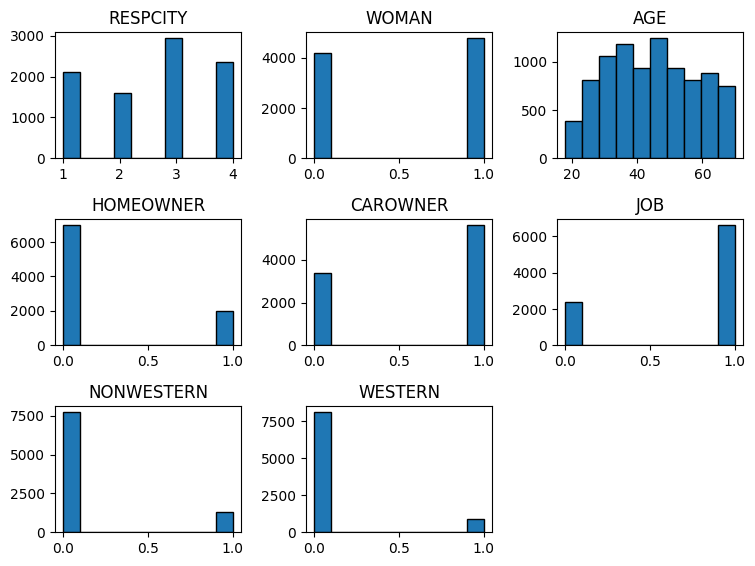

In [11]:
# B
# Use pandas.hist() to plot the histogram of the relevant features
df[sociovars].hist(edgecolor='black',grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

C Reflection <br>
Examining the results of the descriptive analysis, we find that the average `AGE` is approximately 44.5 years, with a dispersion of 13.45 years around this average. In terms of `GENDER` distribution, 53% of the participants are female. Regarding `HOMEOWNER`, 22% of the respondents are homeowners, while 62% `CAROWNER`. Furthermore, the variable `JOB` indicates that around 73% are employed. 

Although we do not have **population statistics** readily available for the populations of the four cities, across the board, the sample looks good. At the very least, we do not see unexpected skews or imbalances <br>

### `2. The linear-additive RUM-MNL model` <br>

Now that we have developed a feeling for our data, we can start with estimating discrete choice models. For this, we will use the Python package called `Biogeme`. 


**`Biogeme database`**<br>
To use this package, we first need to create the data set as a Biogeme database object using `db.Database()`. This object contains the data in a format compatible with the library functions for model estimation in Biogeme.

In [12]:
# db.Database takes as arguments (1) a name (string) and (2) a data set (pandas dataframe)
biodata = db.Database('Neighboorhood_choice_data', df)

**`Biogeme variables`**<br>

Also, we need to create Biogeme objects for all the variables in our data set that we want to use in our model specifications.<br>
The `Variable()` function creates an object that represents the variable values and will allow it to be included in the model estimation function.

In [13]:
# We create Variable objects for each of the variables in the data set that we want to use in the model

# Attributes of alternative 1
STORES1     = Variable('STORES1')
TRANSPORT1  = Variable('TRANSPORT1')
CITY1       = Variable('CITY1')
NOISE1      = Variable('NOISE1')
GREEN1      = Variable('GREEN1')
FOREIGN1    = Variable('FOREIGN1')

# Attributes of alternative 2    
STORES2     = Variable('STORES2')
TRANSPORT2  = Variable('TRANSPORT2')
CITY2       = Variable('CITY2')
NOISE2      = Variable('NOISE2')
GREEN2      = Variable('GREEN2')
FOREIGN2    = Variable('FOREIGN2')
    
# Attributes of alternative 3
STORES3     = Variable('STORES3')
TRANSPORT3  = Variable('TRANSPORT3')
CITY3       = Variable('CITY3')
NOISE3      = Variable('NOISE3')
GREEN3      = Variable('GREEN3')
FOREIGN3    = Variable('FOREIGN3')

# The choice and availabilities of the alternatives
CHOICE      = Variable('CHOICE')
AV1         = Variable('AV1')
AV2         = Variable('AV2')
AV3         = Variable('AV3')

# Socio-economic variables
AGE         = Variable('AGE')
WOMAN       = Variable('WOMAN')
HOMEOWNER   = Variable('HOMEOWNER')
CAROWNER    = Variable('CAROWNER')
RESPCITY    = Variable('RESPCITY')
JOB         = Variable('JOB')

**`The linear-additive utility specification`**

We start with defining the utility specification of the model that we wish to estimate.<br>

For that, we must define the parameters to be estimated and specify the utility functions.<br>

In the linear-additive RUM-MNL model, the observed utility is *V* for alternative *i* is given by:

$V_i = \beta_1 \cdot \text{x}_{1i} + \beta_2 \cdot \text{x}_{2i} + \ldots + \beta_M \cdot \text{x}_{Mi}  $

Where:
- $\beta_1, \beta_2, \ldots, \beta_M$ denote the marginal utility associated with each attribute $m$.
- $\text{x}_{1i}, \text{x}_{2i}, \ldots, \text{x}_{Mi} $ correspond to the attribute values alternative *i*.

The cell below creates this utility function in Biogeme.

In [14]:
# Give a name to the model    
model_name = 'Linear-additive RUM-MNL'

# Define the model parameters, using the function "Beta()", in which you must define:
# the name of the parameter - usually the name of the variable,
# starting value - usually 0, but can be any number,
# lower bound - usually None, but can be any number,
# upper bound - usually None, but can be any number,
# 0 or 1, indicating if the parameter must be estimated. 0 means estimated, 1 means fixed to the starting value. 
B_stores    = Beta('B_stores'   , 0, None, None, 0)
B_transport = Beta('B_transport', 0, None, None, 0)
B_city      = Beta('B_city'     , 0, None, None, 0)
B_noise     = Beta('B_noise'    , 0, None, None, 0)
B_green     = Beta('B_green'    , 0, None, None, 0)
B_foreign   = Beta('B_foreign'  , 0, None, None, 0)

# Define the utility functions
V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

# Dictionary to associate utility functions with the numbering of alternatives
V  = {1: V1, 2: V2, 3: V3}

# Dictionary to associate the availability conditions with the numbering of the alternatives
# 1 means the alternative is available, 0 means it is not available
AV = {1: AV1, 2: AV2, 3: AV3}

**`Estimation function for MNL`** 

Now that we have specified the model, we need to estimate it. To do so, we create the following function `estimate_mnl` which we can re-use.

The estimation function takes the following inputs:
* Dictionary with the utilities functions for each alternative (**V**)
* Dictionary with the availabilities for each alternative (**AV**)
* Chosen alternatives array (**CHOICE**)
* Biogeme database which contains the relevant attributes and characteristics (**database**)
* Model name (**"string"**)

In [15]:
# This function estimates the MNL model and returns the estimation results
# input values: utilities for all three alternatives, the choices, the database, and the model name

def estimate_mnl(V, AV, CHOICE, database, model_name):

    # Define the choice model: The function models.logit() computes the MNL choice probabilities of the chosen alternative given the V. 
    prob = models.logit(V, AV, CHOICE)

    # Define the log-likelihood by taking the log of the choice probabilities of the chosen alternative
    LL = log(prob)
   
    # Create the Biogeme object containing the object database and the formula for the contribution to the log-likelihood of each row using the following syntax:
    biogeme = bio.BIOGEME(database, LL)
    
    # The following syntax passes the name of the model:
    biogeme.modelName = model_name

    # Some object settings regaridng whether to save the results and outputs 
    biogeme.generate_pickle = False
    biogeme.generate_html = False
    biogeme.save_iterations = False

    # Syntax to calculate the null log-likelihood. The null-log-likelihood is used to compute the rho-square 
    biogeme.calculate_null_loglikelihood(AV)

    # This line starts the estimation and returns the results object.
    results = biogeme.estimate()
    return results

**`Estimation`**

We have created a biogeme database (biodata); we have defined our utility functions; and, we have created an estimation function to estimate MNL models (estimate_mnl).<br> 
Now, we only need to invoke the estimation by bringing these ingredients together. We pass the model specifications and the database to the estimation function. The function `estimate_mnl` returns an object which contains the estimation results.

In [16]:
# Estimate the model
results_MNL = estimate_mnl(V,AV,CHOICE,biodata,model_name)

**`View estimation results`**<br>

**Estimation statistics**

We can display a summary of the estimation statistics using `results.short_summary()` in which we see: 

* `Number of parameters`: Parameters being estimated.
* `Sample size`: The number of observations in the data set (used for estimating the model).
* `Excluded data`: The number of observations in the data set that were excluded for estimation.
* `Null log-likelihood`: The log-likelihood of the null model.
* `Final log-likelihood`: The log-likelihood of the estimated model.
* `Likelihood ratio test (null)`: A statistical test comparing the null model's likelihood with the likelihood of the estimated model. 
* `Rho square (null)`: Quantifies how well the model explains the data compared to the null model.
* `Rho bar square (null)`: Quantifies how well the model explains the data compared to the null model while penalising for the number of model parameters.
* `Akaike Information Criterion (AIC)`: A measure that shows the goodness of fit of the model, where lower AIC values indicate better models.
* `Bayesian Information Criterion (BIC)`: Similar to AIC, it penalizes model complexity more heavily, with lower values indicating better-fitting models while considering complexity.

**Parameter estimates**

We can display the estimated parameters using `results.getEstimatedParameters()`. Besides maximum likelihood estimates, we also see the associated standard errors, t-test values and p-values. The t-test values and p-values show the significance of the effect, demonstrating the generalisability of the relationship to the population.

In [17]:
# Print the estimation statistics
print_results(results_MNL)

# Store the LL of the MNL model for later use
LL_MNL = results_MNL.data.logLike



Results for model Linear-additive RUM-MNL
Nbr of parameters:		6
Sample size:			8992
Excluded data:			0
Null log likelihood:		-9878.722
Final log likelihood:		-7983.546
Likelihood ratio test (null):		3790.351
Rho square (null):			0.192
Rho bar square (null):			0.191
Akaike Information Criterion:	15979.09
Bayesian Information Criterion:	16021.72

              Value  Rob. Std err  Rob. t-test  Rob. p-value
B_city      -0.1670        0.0083       -20.15           0.0
B_foreign   -1.1790        0.1119       -10.53           0.0
B_green      0.4154        0.0117        35.49           0.0
B_noise     -0.4390        0.0109       -40.43           0.0
B_stores    -0.0346        0.0027       -13.01           0.0
B_transport -0.0752        0.0026       -29.48           0.0


### `Exercise 2:  Interpreting modelling outcomes`<br>

Interpret the outcomes of your RUM-MNL model by answering the following questions:

`A` Has the model converged? <br>

`B` Are all estimated parameters of the expected sign? <br>

`C` Are they significant at the 5% level? <br>

`D` Based on the Likelihood Ratio Test: is the estimated model statistically superior to a  model that determines choices by ‘throwing a dice’? (i.e., the Null model).

#### `Answers`

In [19]:
# Your code and answers

# A. Yes, if the model would not have converged, we would have seen very large standard errors and somethings warnings about the model not converging.

# B Yes, we expect a negative paramaters for all attributes except green, because we expect that the larger distances to stores, public transport, more noise, and a higher share of foreigners makes the neighbourhood less attractive to the avg citizen.

# C Yes, all p val are <0.05, so we can reject the null hypothesis that the parameters are zero.

# D Yes, -2 * (-9878.722 - -7983.546) = 1895.176. The number of extra parameters is 6. The critical Chi2 value is 12.59. 1895.176 > 12.59, so we can savely say that the model is beter than throwing a dice.

**`Attribute importance`**<br>

Next, we explore the importance of each attribute to the choice behaviour. One way do do this is by assessing how much the model fit deteriorates when we fix this beta to zero. By fixing the beta to zero, the attribute has no effect on utility and thus can not contribute to explaining the choices. We fix all six betas, one-by-one. A large drop in model fit indicates a great importance of attribute. After all, it means that without having access to that attribute, the model is less capable of explaining the choice behaviour.    

In [20]:
# Create a list with the parameter names
param_list = ['B_stores','B_transport','B_city','B_noise','B_green','B_foreign']

# Create an empty dataframe with the parameter names as index (rows) to store the results
df_out = pd.DataFrame(index = param_list + ['LL'])

# Loop over the parameters
for param_fix in param_list:
    
    model_name = f'linear-additive RUM-MNL with {param_fix} fixed to zero'
   
    # Parameters to be estimated
    # Note that int(param_fix == 'B_stores') returns 1 if param_fix is 'B_stores', and 0 otherwise
    B_stores    = Beta('B_stores'   , 0, None, None, int(param_fix == 'B_stores'))
    B_transport = Beta('B_transport', 0, None, None, int(param_fix == 'B_transport'))
    B_city      = Beta('B_city'     , 0, None, None, int(param_fix == 'B_city'))
    B_noise     = Beta('B_noise'    , 0, None, None, int(param_fix == 'B_noise'))
    B_green     = Beta('B_green'    , 0, None, None, int(param_fix == 'B_green'))
    B_foreign   = Beta('B_foreign'  , 0, None, None, int(param_fix == 'B_foreign'))
    
    # Definition of the utility functions
    V1 = B_stores * STORES1 + B_transport * TRANSPORT1 + B_city * CITY1 + B_noise * NOISE1 + B_green * GREEN1 + B_foreign * FOREIGN1
    V2 = B_stores * STORES2 + B_transport * TRANSPORT2 + B_city * CITY2 + B_noise * NOISE2 + B_green * GREEN2 + B_foreign * FOREIGN2
    V3 = B_stores * STORES3 + B_transport * TRANSPORT3 + B_city * CITY3 + B_noise * NOISE3 + B_green * GREEN3 + B_foreign * FOREIGN3

    # Dictionary to associate utility functions with the numbering of alternatives
    V  = {1: V1, 2: V2, 3: V3}

    # Dictionary to associate the availability conditions with the numbering of the alternatives
    AV = {1: AV1, 2: AV2, 3: AV3}

    # Estimate the model
    results = estimate_mnl(V,AV,CHOICE,biodata,model_name)

    # Store the parameter estimates in a dataframe
    col = param_fix + '_fixed'
    df_out.loc[:,col] = results.get_beta_values()

    # Store the log-likelihood
    df_out.loc['LL',col] = results.get_general_statistics()['Final log likelihood'][0]

# Show the dataframe with the results
df_out.round(3)

,B_stores_fixed,B_transport_fixed,B_city_fixed,B_noise_fixed,B_green_fixed,B_foreign_fixed
B_stores,NaN,-0.028,-0.029,-0.025,-0.029,-0.035
B_transport,-0.072,NaN,-0.067,-0.068,-0.071,-0.073
B_city,-0.155,-0.131,NaN,-0.117,-0.138,-0.166
B_noise,-0.426,-0.414,-0.403,NaN,-0.409,-0.437
B_green,0.410,0.386,0.395,0.370,NaN,0.417
B_foreign,-1.191,-1.009,-1.155,-1.036,-1.230,NaN
LL,-8069.214,-8417.768,-8195.161,-8756.695,-8636.970,-8037.707


### `Exercise 3: Attribute importance`<br>

`A` List the attributes from most important to least important, based on their impact on the model fit.

`B` Use the Likelihood Ratio Statistic (LRS) to test, for each of the six models, whether the restricted model is statistically preferred over the unrestricted model (i.e. the linear-additive RUM-MNL model with LL = -7983.546 and 6 parameters).<br>
<br>
The LRS is given by: <br>
<br>
$LRS = -2 \left[LL(\beta_R)-LL(\beta_U)\right] $<br>
<br>
Where $\beta_R$ and $\beta_U$ correspond to the parameters estimated using a restricted and unrestricted model, respectively.<br>

You need to compare the LRS with the critical $\chi^2$ value associated with a specific significance level. If $LRS > \chi^2_{df}$ , you can conclude that the unrestricted model better explains the data than the restricted model.<br>

Use α = 0.01 as the critical threshold level of significance. The [Chi-Square Distribution Table](https://github.com/SEN1221TUD/Tutorials/blob/main/assets/Chi-Square%20Distribution%20Table.pdf), can be found here.<br>

#### `Answers`


In [21]:
# A. To get the list the attributes from most important to least important, based on their impact on the model fit, we sort the LL column in ascending order, and then take the index.
df_out.loc['LL',:].sort_values(ascending=True).index[:].to_list()

['B_noise_fixed',
 'B_green_fixed',
 'B_transport_fixed',
 'B_city_fixed',
 'B_stores_fixed',
 'B_foreign_fixed']

In [22]:
# B. We compute the LRS for each model 
df_out.loc['LRS',:] = -2*(df_out.loc['LL',:] -(LL_MNL))

# We determine the critical Chi-square value for a 99% confidence interval and 1 degrees of freedom: 6.63
df_out.loc['LRSCHI2', :] = (df_out.loc['LRS', :] > 6.63).astype(float)

# The table shows all models exceed the critical Chi-square value. In other words, all attributes are important to explain the choice behaviour
df_out

,B_stores_fixed,B_transport_fixed,B_city_fixed,B_noise_fixed,B_green_fixed,B_foreign_fixed
B_stores,NaN,-0.028097,-0.028662,-0.025020,-0.029345,-0.034940
B_transport,-0.072484,NaN,-0.066770,-0.067829,-0.070566,-0.073367
B_city,-0.155126,-0.130824,NaN,-0.116690,-0.137860,-0.166274
B_noise,-0.426109,-0.414488,-0.402904,NaN,-0.408895,-0.436946
B_green,0.410171,0.385945,0.395455,0.369867,NaN,0.417013
B_foreign,-1.190918,-1.008946,-1.155193,-1.035816,-1.230157,NaN
LL,-8069.214104,-8417.767723,-8195.160550,-8756.695104,-8636.969748,-8037.706814
LRS,171.335974,868.443213,423.228866,1546.297975,1306.847263,108.321395
LRSCHI2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### `3. Market share forecasting for Zurich`

Suppose the municipality of Zurich plans to redevelop one of their least accessible neighbourhoods in the North: `Affoltern, Oerlikon, Seebach` (11). Figure 1 shows the neighbourhoods of Zurich. The municipality plans to develop a new shopping area and public transport hub in the neighbourhood. The idea is that this will make the neighbourhood more attractive to live in. But, these plans are costly. Therefore, to make an informed decision, the municipality needs to have a good understanding of the impact of increasing the accessibility in `Affoltern, Oerlikon, Seebach` on the residential demand in that neighbourhood. <br>

The **current** situation - in terms of the attributes we have looked at in this study - is shown in the table below.<br>
**After** the redevelopment, the average distance to grocery stores and public transport is 5 minutes (STORES = 5, TRANSPORT = 5) instead of 15 minutes.


| neighbourhood name                        | ID         | CITY    | FOREIGN  | GREEN  | NOISE  | STORES   | TRANSPORT  |
|-------------------------------------------|------------|---------|----------|--------|--------|----------|------------|
| Altstadt                                  | 1          | 1       | 0.22     | 2      | 1      | 2        | 5          |
| Enge, Wollishofen, Leimbach               | 2          | 4       | 0.16     | 4      | 3      | 5        | 10         |
| Wiedikon                                  | 3          | 3       | 0.23     | 3      | 3      | 10       | 15         |
| Aussersihl                                | 4          | 2       | 0.27     | 1      | 4      | 5        | 5          |
| Industriequartier                         | 5          | 2       | 0.18     | 1      | 4      | 10       | 2          |
| Oberstrass, Unterstrass                   | 6          | 3       | 0.16     | 3      | 3      | 10       | 10         |
| Fluntern, Hottingen, Hirslanden, Witikon  | 7          | 4       | 0.16     | 4      | 1      | 10       | 15         |
| Riesbach                                  | 8          | 3       | 0.18     | 3      | 3      | 5        | 15         |
| Altstetten, Albisrieden                   | 9          | 4       | 0.31     | 3      | 2      | 5        | 10         |
| Wipkingen, Höngg                          | 10         | 4       | 0.25     | 4      | 3      | 15       | 10         |
| Affoltern, Oerlikon, Seebach              | 11         | 4       | 0.33     | 3      | 3      | 15       | 15         |
| Schwamendingen                            | 12         | 4       | 0.36     | 4      | 3      | 5        | 10         |

![Zurich](assets/zurich.png)

To inform this policy decision, we will use our estimated choice models. To do so, we take the following steps:
1. We use our estimated MNL model to compute the choice probabilities of the neighbourhoods for the **current situation**
2. We use our estimated MNL model to compute the choice probabilities of the neighbourhoods for the **future situation**
3. We compare the probabilities between the present and future.

In [23]:
# Load the data as a pandas dataframe
data_path =  Path(f'data/zurich_data.csv')
df_zurich = pd.read_csv(data_path, index_col=0)

# Show the the dataframe
df_zurich

,ID,CITY,FOREIGN,GREEN,NOISE,STORES,TRANSPORT
Neighbourhood,,,,,,,
Altstadt,1,1,0.2222,2,1,2,5
"Enge, Wollishofen, Leimbach",2,4,0.1572,4,3,5,10
Wiedikon,3,3,0.2345,3,3,10,15
Aussersihl,4,2,0.2734,1,4,5,5
Industriequartier,5,2,0.1806,1,4,10,2
"Oberstrass, Unterstrass",6,3,0.1588,3,3,10,10
"Fluntern, Hottingen, Hirslanden, Witikon",7,4,0.1600,4,1,10,15
Riesbach,8,3,0.1798,3,3,5,15
"Altstetten, Albisrieden",9,4,0.3077,3,2,5,10


In [24]:
# Manually compute the utilities for each neighbourhood alternative in the present situation
# Let's use our benchmark linear-additive MNL model

# Get the estimated parameters from the results object
beta_hat_MNL = results_MNL.get_estimated_parameters()

# Compute the utilities for each alternative in the present situation using the estimated parameters
V_zurich_present =  (beta_hat_MNL['Value']['B_city']      * df_zurich['CITY'] +
                     beta_hat_MNL['Value']['B_foreign']   * df_zurich['FOREIGN'] + 
                     beta_hat_MNL['Value']['B_green']     * df_zurich['GREEN'] + 
                     beta_hat_MNL['Value']['B_noise']     * df_zurich['NOISE'] + 
                     beta_hat_MNL['Value']['B_stores']    * df_zurich['STORES'] + 
                     beta_hat_MNL['Value']['B_transport'] * df_zurich['TRANSPORT'])

# Compute the market shares using the logit formula: Pi = exp(Vi)/sum(exp(Vj)) 
P_present = np.exp(V_zurich_present)/np.sum(np.exp(V_zurich_present))

In [25]:
# Manually compute the market shares for each neighbourhood alternative in the future scenario

# Create a copy of the dataframe, and change the accessibility of stores and transport in the neighbourhoods Affoltern, Oerlikon, and Seebach
df_zurich_future = df_zurich.copy()
df_zurich_future.loc['Affoltern, Oerlikon, Seebach','STORES'] = 5
df_zurich_future.loc['Affoltern, Oerlikon, Seebach','TRANSPORT'] = 5

# Manually compute the utilities for each neighbourhood alternative in the future situation
V_zurich_future = (beta_hat_MNL['Value']['B_city']      * df_zurich_future['CITY'] +
                   beta_hat_MNL['Value']['B_foreign']   * df_zurich_future['FOREIGN'] + 
                   beta_hat_MNL['Value']['B_green']     * df_zurich_future['GREEN'] + 
                   beta_hat_MNL['Value']['B_noise']     * df_zurich_future['NOISE'] + 
                   beta_hat_MNL['Value']['B_stores']    * df_zurich_future['STORES'] + 
                   beta_hat_MNL['Value']['B_transport'] * df_zurich_future['TRANSPORT'])

# Compute the market shares using the logit formula
P_future = np.exp(V_zurich_future)/np.sum(np.exp(V_zurich_future))

In [26]:
# Create a dataframe with the market shares in the present and future scenarios
df_zurich_marketshares = pd.DataFrame({'Present [%]': P_present*100, 'Future [%]': P_future*100})

# Show the dataframe
df_zurich_marketshares.round(2)

,Present [%],Future [%]
Neighbourhood,,
Altstadt,25.40,22.61
"Enge, Wollishofen, Leimbach",9.81,8.73
Wiedikon,4.04,3.59
Aussersihl,3.23,2.87
Industriequartier,3.79,3.38
"Oberstrass, Unterstrass",6.43,5.72
"Fluntern, Hottingen, Hirslanden, Witikon",13.59,12.10
Riesbach,5.12,4.55
"Altstetten, Albisrieden",8.41,7.49


The table shows that the market share of `Affoltern, Oerlikon, Seebach` increases substantially: it more than doubles.<br> Hence, the model suggests that increasing accessibility will make the neighbourhood considerably more attractive. 


### `Exercise 4: Forecasting`

`A` Determine which neighbourhoods lose the most market share in (a) absolute and (b) relative terms.<br>

`B` Reflect on the behavioural realism of your results, especially w.r.t. the relative changes in market shares. <br>

`C` Currently, `Affoltern, Oerlikon, Seebach` is a quiet urban area. The creation of a public transport hub there will likely increase the average noise levels. Our earlier analysis showed that noise is an important factor in the residential location choice. Therefore, a change in noise levels needs also to be taken into account. <br>

* Create a plot showing how increasing noise for 1 to 4 leads to a deterioration of the market share of `Affoltern, Oerlikon, Seebach`. Thus, the *x*-axis shows the noise level, and the *y*-axis the market share.<br>

* Based on your results, what would you recommend to the planners of Zurich?

In [27]:
# Your code and answers

#### `Answers`

In [28]:
# (a) Compute the absolute change in market share
df_zurich_marketshares['deltaP_abs'] = df_zurich_marketshares['Future [%]'] - df_zurich_marketshares['Present [%]']

# (b) compute the relative change in market share
df_zurich_marketshares['deltaP_rel'] = df_zurich_marketshares['deltaP_abs'] / df_zurich_marketshares['Present [%]']

# Sort the dataframe by the absolute change in market share
df_zurich_marketshares.sort_values(by='deltaP_abs', ascending=False).round(2)

,Present [%],Future [%],deltaP_abs,deltaP_rel
Neighbourhood,,,,
"Affoltern, Oerlikon, Seebach",6.18,16.49,10.31,1.67
Aussersihl,3.23,2.87,-0.35,-0.11
Industriequartier,3.79,3.38,-0.42,-0.11
Wiedikon,4.04,3.59,-0.44,-0.11
Riesbach,5.12,4.55,-0.56,-0.11
"Wipkingen, Höngg",6.24,5.55,-0.69,-0.11
"Oberstrass, Unterstrass",6.43,5.72,-0.71,-0.11
Schwamendingen,7.76,6.91,-0.85,-0.11
"Altstetten, Albisrieden",8.41,7.49,-0.92,-0.11


A. Determine which neighbourhoods lose the most market share in (a) absolute and (b) relative terms.

        --> Altstadt loses the most market share in absolute terms.
        --> In relative terms, all neighbourhoods lose an equal proportion. This is due to the Independence from Irrelevant Alternatives (IIA) property of the MNL model, which says that IIA the relative changes in market shares are equal across alternatives. 

B. Reflect on the behavioural realism of your results, especially wrt the relative changes in market shares. 

        --> It is behaviourally unrealistic that Altstadt loses the most market share. Altstadt and Affoltern probably have little in common in terms of the unobserved utilities. E.g. a city centre is vibrant and typically attracts young and highly educated people, while a suburb attracts families (which more often commute by car).  Therefore, it is more likely that proportionally more market share is taken away from neighbourhoods close to Alflotern. 

In [29]:
# C. (1)
# Create a list with the noise levels
noise_lst = [1,2,3,4]

# Loop over the noise levels
for noise in noise_lst:

    # Change the noise level in the zurich_future dataframe
    df_zurich_future.loc['Affoltern, Oerlikon, Seebach','NOISE'] = noise

    # Manually compute the utilities for each neighbourhood alternative in the future situation
    V_zurich_future_ns =   (beta_hat_MNL['Value']['B_city']      * df_zurich_future['CITY'] +
                            beta_hat_MNL['Value']['B_foreign']   * df_zurich_future['FOREIGN'] + 
                            beta_hat_MNL['Value']['B_green']     * df_zurich_future['GREEN'] + 
                            beta_hat_MNL['Value']['B_noise']     * df_zurich_future['NOISE'] + 
                            beta_hat_MNL['Value']['B_stores']    * df_zurich_future['STORES'] + 
                            beta_hat_MNL['Value']['B_transport'] * df_zurich_future['TRANSPORT'])
    
    # Compute the market shares using the logit formula
    P_future_ns = np.exp(V_zurich_future_ns)/np.sum(np.exp(V_zurich_future_ns))

    # Add the results to the dataframe
    df_zurich_marketshares[f'Future [%] noise={noise}'] = P_future_ns*100

# Show the dataframe
df_zurich_marketshares.round(2)

,Present [%],Future [%],deltaP_abs,deltaP_rel,Future [%] noise=1,Future [%] noise=2,Future [%] noise=3,Future [%] noise=4
Neighbourhood,,,,,,,,
Altstadt,25.40,22.61,-2.79,-0.11,22.61,24.02,25.02,25.72
"Enge, Wollishofen, Leimbach",9.81,8.73,-1.08,-0.11,8.73,9.28,9.67,9.93
Wiedikon,4.04,3.59,-0.44,-0.11,3.59,3.82,3.97,4.09
Aussersihl,3.23,2.87,-0.35,-0.11,2.87,3.05,3.18,3.27
Industriequartier,3.79,3.38,-0.42,-0.11,3.38,3.59,3.74,3.84
"Oberstrass, Unterstrass",6.43,5.72,-0.71,-0.11,5.72,6.08,6.33,6.51
"Fluntern, Hottingen, Hirslanden, Witikon",13.59,12.10,-1.49,-0.11,12.10,12.85,13.39,13.76
Riesbach,5.12,4.55,-0.56,-0.11,4.55,4.84,5.04,5.18
"Altstetten, Albisrieden",8.41,7.49,-0.92,-0.11,7.49,7.95,8.29,8.52


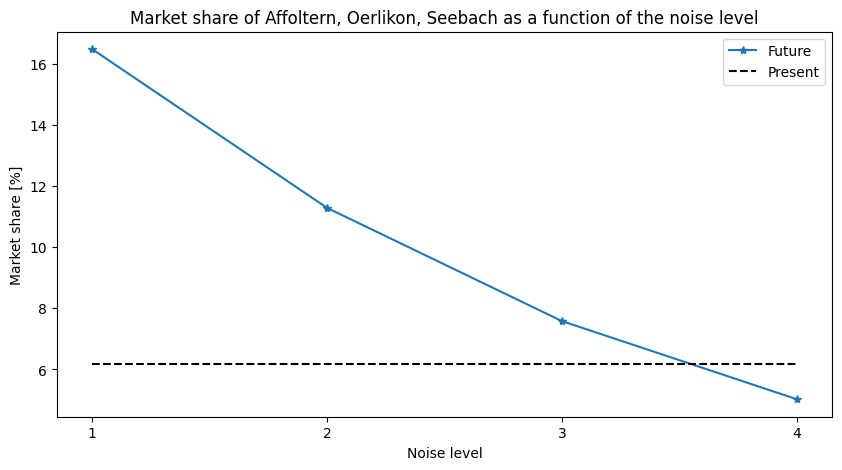

In [30]:
# Create a plot to show the market share as a function of the noise level 
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the market shares for the neighbourhood as a function of the noise level
ax.plot(noise_lst, df_zurich_marketshares.loc['Affoltern, Oerlikon, Seebach',['Future [%] noise=1','Future [%] noise=2','Future [%] noise=3','Future [%] noise=4']],'-*',label='Future')

# Plot the present market share
marketshare_current = df_zurich_marketshares.loc['Affoltern, Oerlikon, Seebach',['Present [%]']]
ax.plot(noise_lst, np.tile(marketshare_current,4), 'k--', label='Present')

# Add a title and axis labels
ax.set_title('Market share of Affoltern, Oerlikon, Seebach as a function of the noise level')
ax.set_xlabel('Noise level')
ax.set_ylabel('Market share [%]')
ax.set_xticks(noise_lst)
ax.set_xticklabels(noise_lst)
ax.legend()

# Show the plot
plt.show()

(2) Based on your results, what would you recommend to the planners of Zurich?

        --> Ensure that noise levels stay below 4. Otherwise, the neighbourhood will overall become less attractive.
        --> Use a model estimated only on the data of Zurich. The current market share forecasts are made based on the mean preference of a mix of Swiss and German inhabitants
        --> Use a model that accounts for nonlinear effects of noise on utility
        --> Use a model that accounts for observed heterogeneity through interactions, e.g. to capture the effect that young people may be less sensitive to noise than older people

## END